# Part 1 

In [183]:
import sqlite3
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import numpy as np

In [300]:
sqlite_file = 'lahman2014.sqlite'
conn = sqlite3.connect(sqlite_file)

salary_query = "SELECT x.teamID, x.yearID, x.W, x.G, sum(y.salary) as total_sal, CAST(W as float) / CAST(G as float)*100 as Win_Percentage From Teams x INNER JOIN Salaries y ON x.teamID = y.teamID AND x.yearID = y.yearID GROUP BY x.teamID, x.yearID"
team_salaries = pd.read_sql(salary_query, conn)

team_salaries.head(100000)

,teamID,yearID,W,G,total_sal,Win_Percentage
0,ANA,1997,84,162,31135472.0,51.851852
1,ANA,1998,85,162,41281000.0,52.469136
2,ANA,1999,70,162,55388166.0,43.209877
3,ANA,2000,82,162,51464167.0,50.617284
4,ANA,2001,75,162,47535167.0,46.296296
...,...,...,...,...,...,...
853,WAS,2010,69,162,61400000.0,42.592593
854,WAS,2011,80,161,63856928.0,49.689441
855,WAS,2012,98,162,80855143.0,60.493827
856,WAS,2013,86,162,113703270.0,53.086420


# Part 2

/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Total Salary of Team(in Hundred Millions)')

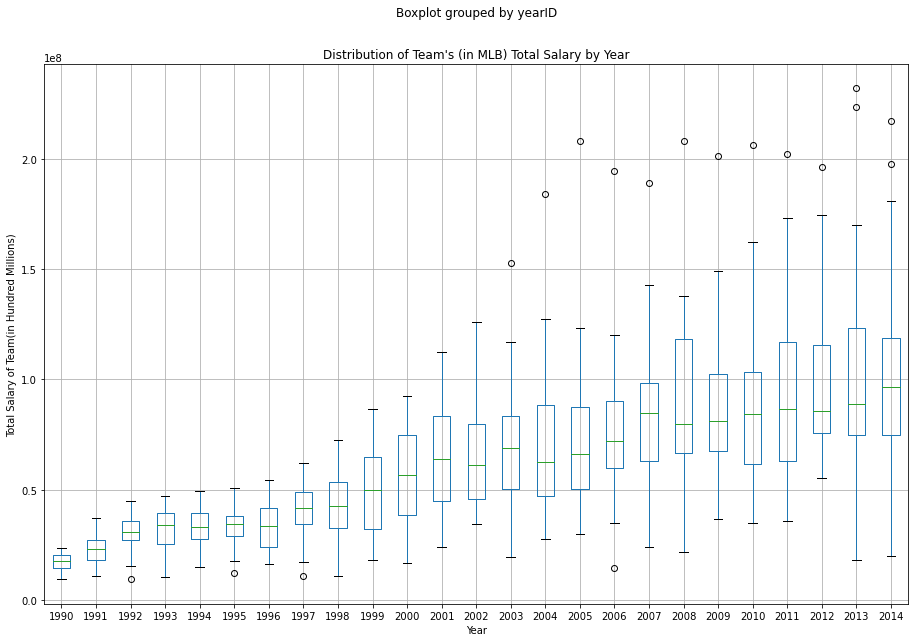

In [301]:
salaries = team_salaries.loc[team_salaries['yearID'] >= 1990]
salaries.boxplot(column='total_sal',by='yearID',figsize=(15,10))

plt.title('Distribution of Team\'s (in MLB) Total Salary by Year')
plt.xlabel('Year')
plt.ylabel('Total Salary of Team(in Hundred Millions)')

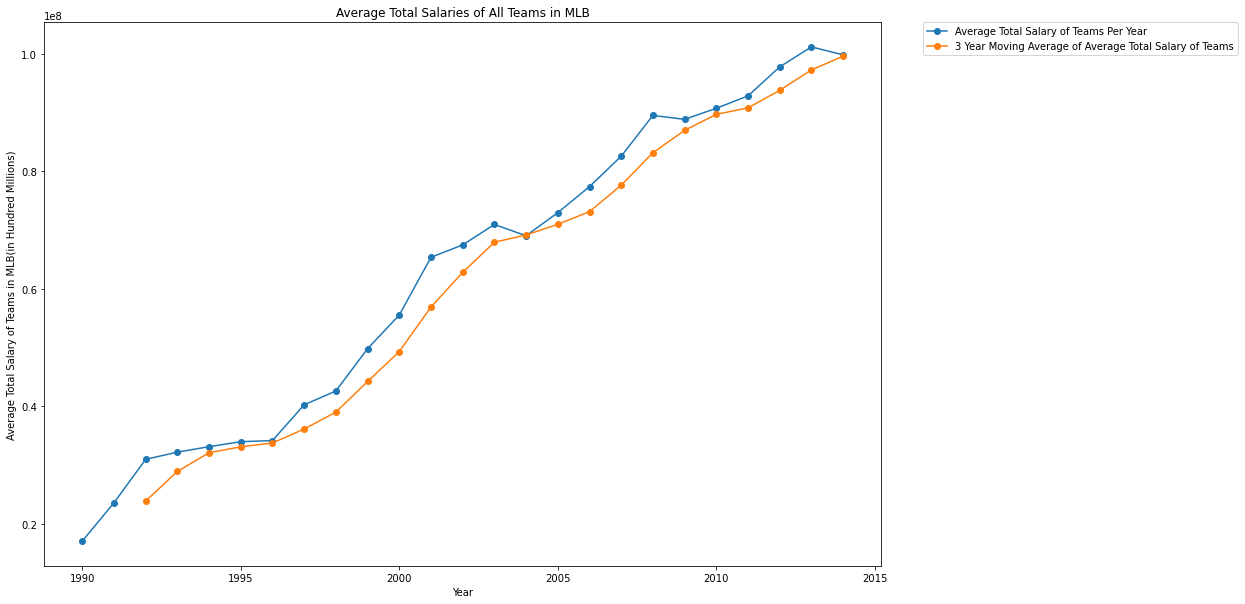

In [302]:

df = team_salaries.groupby(['yearID'],as_index=False)['total_sal'].mean()
df = df.loc[df['yearID'] >= 1990]
plt.figure(figsize=(15,10))
plt.plot('yearID','total_sal', data=df, linestyle='-', marker='o', 
         label = 'Average Total Salary of Teams Per Year')
df=df.rolling(3,on='yearID').mean()
plt.plot('yearID','total_sal', data=df, linestyle='-', marker='o', 
         label = '3 Year Moving Average of Average Total Salary of Teams')

plt.title('Average Total Salaries of All Teams in MLB')
plt.xlabel('Year')
plt.ylabel('Average Total Salary of Teams in MLB(in Hundred Millions)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


<ipython-input-303-f3bce51cbf35>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salaries['bin'] = pd.cut(salaries['yearID'],bins=5,labels=['1','2','3','4','5'])


[2.12728242e-07 4.38956724e+01]


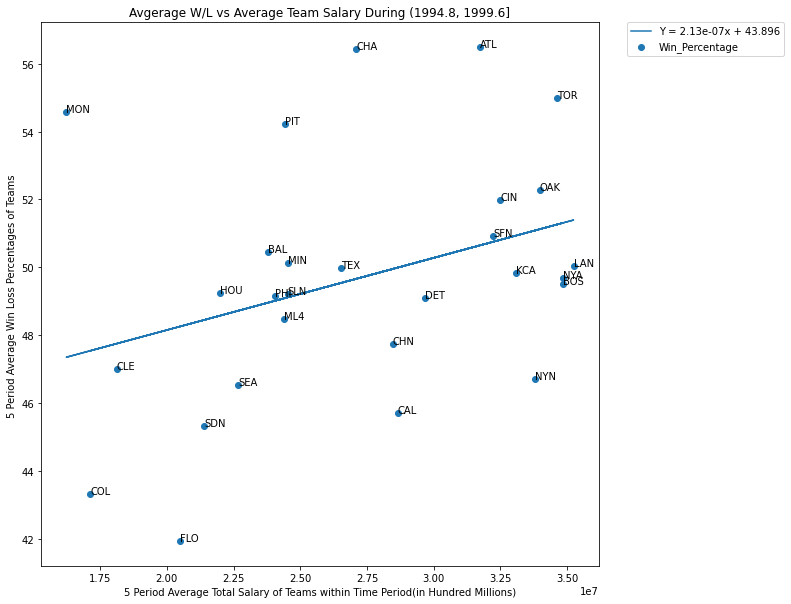

[3.23646122e-07 3.67462780e+01]


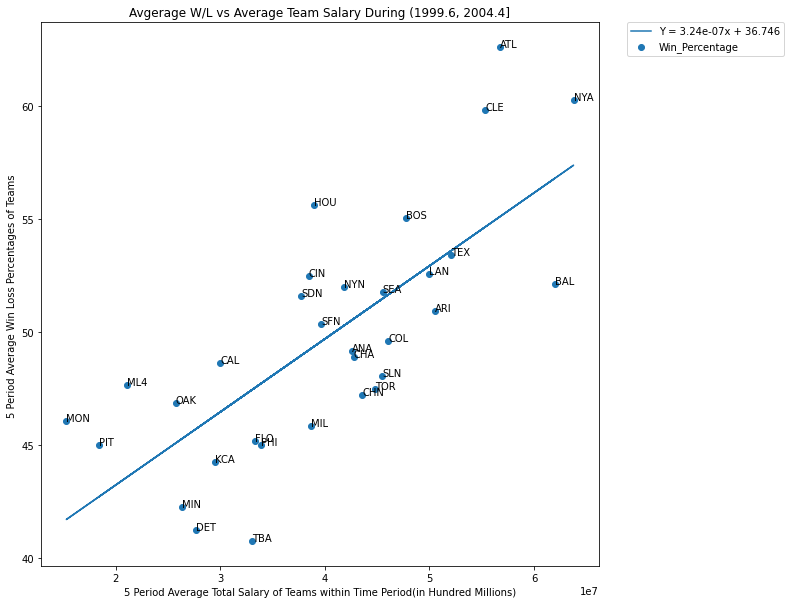

[1.44541252e-07 4.04913180e+01]


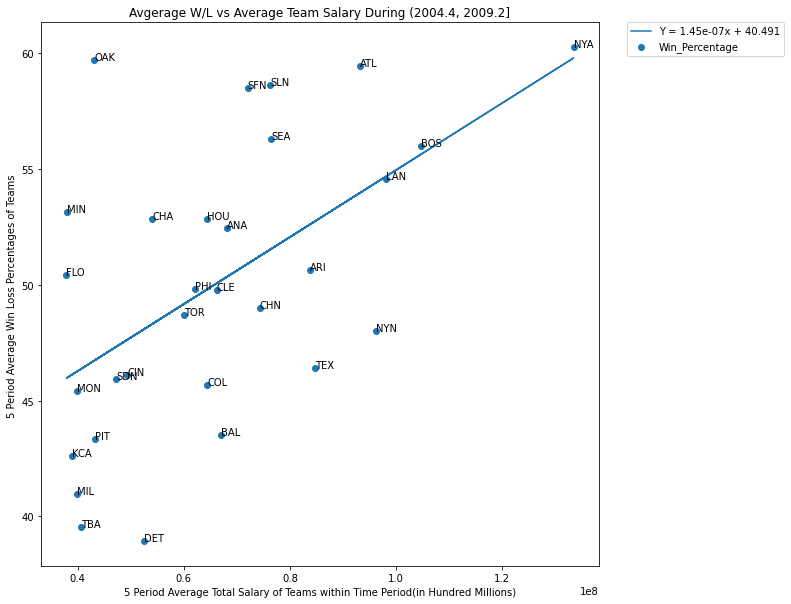

[9.56872943e-08 4.21244653e+01]


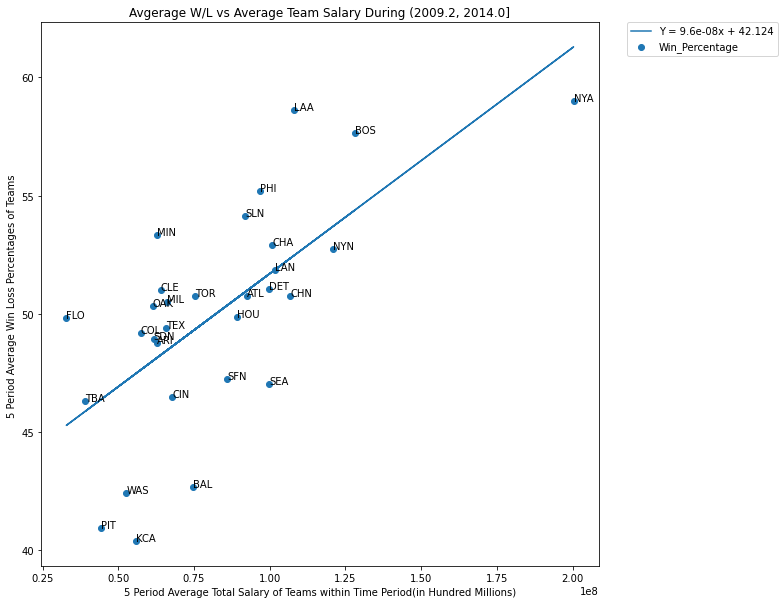

[6.06066344e-08 4.40727810e+01]


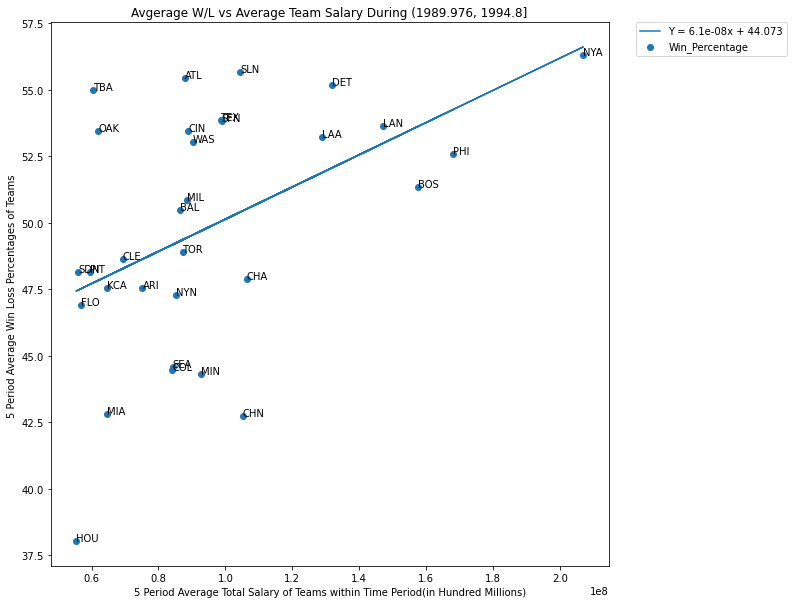

In [303]:
ranges = pd.cut(salaries['yearID'],bins=5).unique()
salaries['bin'] = pd.cut(salaries['yearID'],bins=5,labels=['1','2','3','4','5'])
win_loss = salaries.groupby(['bin','teamID']).mean().reset_index()
for x in range(1,6):
    plt.figure(figsize=(10,10))
    bins = win_loss.loc[win_loss['bin'] == str(x)].dropna().reset_index()
    plt.scatter('total_sal','Win_Percentage', data=bins, marker='o')
    coeffs = (np.polyfit(bins['total_sal'], bins['Win_Percentage'], 1))
    print(coeffs)
    plt.plot(bins['total_sal'], np.poly1d(np.polyfit(bins['total_sal'], bins['Win_Percentage'], 1))(bins['total_sal']), 
             label = "Y = " + str(round(coeffs[0],9)) + "x + " + str(round(coeffs[1],3)))
    
    
    for i, txt in enumerate(bins['teamID']):
        plt.annotate(txt, (bins['total_sal'][i], bins['Win_Percentage'][i]), fontsize=10)

    plt.title('Avgerage W/L vs Average Team Salary During ' + str(ranges[x-1]))
    plt.ylabel('5 Period Average Win Loss Percentages of Teams ')
    plt.xlabel('5 Period Average Total Salary of Teams (in Hundred Millions)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()


# Part 3

    teamID  yearID   W    G  total_sal  Win_Percentage bin
353    KCA    1990  75  161   1.667287       46.583851   1
793    TEX    1990  83  162  -0.582735       51.234568   1
162    CHN    1990  77  162  -0.914238       47.530864   1
536    NYN    1990  91  162   1.232949       56.172840   1
596    PHI    1990  77  162  -1.033631       47.530864   1
..     ...     ...  ..  ...        ...             ...  ..
710    SEA    2014  87  162  -0.159040       53.703704   5
680    SDN    2014  77  162  -0.527607       47.530864   5
216    CIN    2014  76  162   0.184170       46.913580   5
740    SFN    2014  88  162  -1.745978       54.320988   5
857    WAS    2014  96  162   0.704160       59.259259   5

[728 rows x 7 columns]


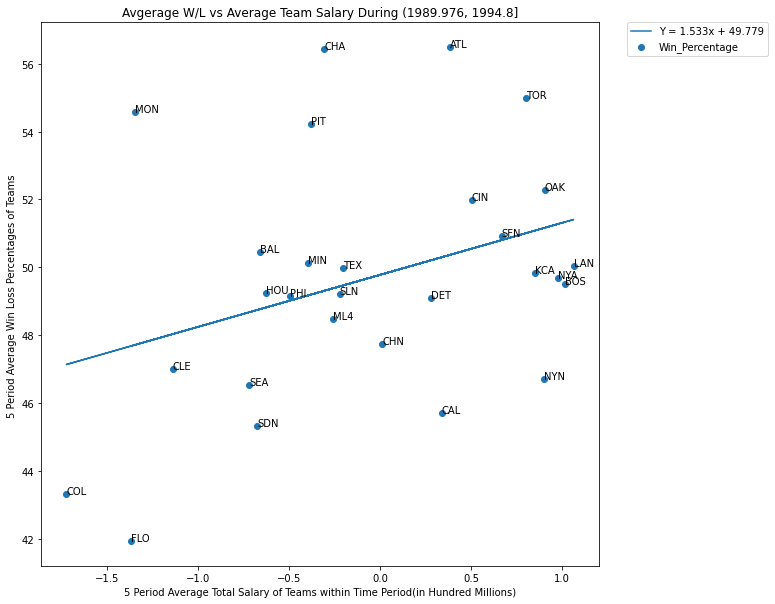

    teamID  yearID   W    G  total_sal  Win_Percentage bin
353    KCA    1990  75  161   1.667287       46.583851   1
793    TEX    1990  83  162  -0.582735       51.234568   1
162    CHN    1990  77  162  -0.914238       47.530864   1
536    NYN    1990  91  162   1.232949       56.172840   1
596    PHI    1990  77  162  -1.033631       47.530864   1
..     ...     ...  ..  ...        ...             ...  ..
710    SEA    2014  87  162  -0.159040       53.703704   5
680    SDN    2014  77  162  -0.527607       47.530864   5
216    CIN    2014  76  162   0.184170       46.913580   5
740    SFN    2014  88  162  -1.745978       54.320988   5
857    WAS    2014  96  162   0.704160       59.259259   5

[728 rows x 7 columns]


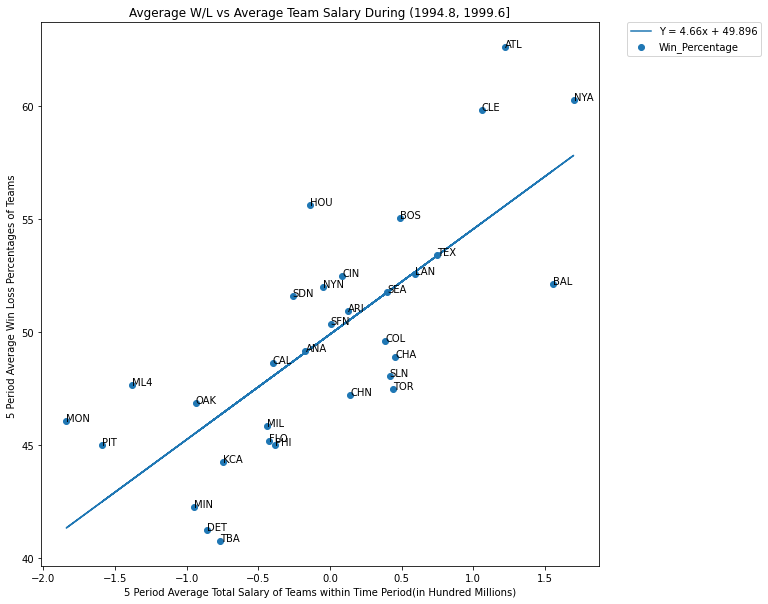

    teamID  yearID   W    G  total_sal  Win_Percentage bin
353    KCA    1990  75  161   1.667287       46.583851   1
793    TEX    1990  83  162  -0.582735       51.234568   1
162    CHN    1990  77  162  -0.914238       47.530864   1
536    NYN    1990  91  162   1.232949       56.172840   1
596    PHI    1990  77  162  -1.033631       47.530864   1
..     ...     ...  ..  ...        ...             ...  ..
710    SEA    2014  87  162  -0.159040       53.703704   5
680    SDN    2014  77  162  -0.527607       47.530864   5
216    CIN    2014  76  162   0.184170       46.913580   5
740    SFN    2014  88  162  -1.745978       54.320988   5
857    WAS    2014  96  162   0.704160       59.259259   5

[728 rows x 7 columns]


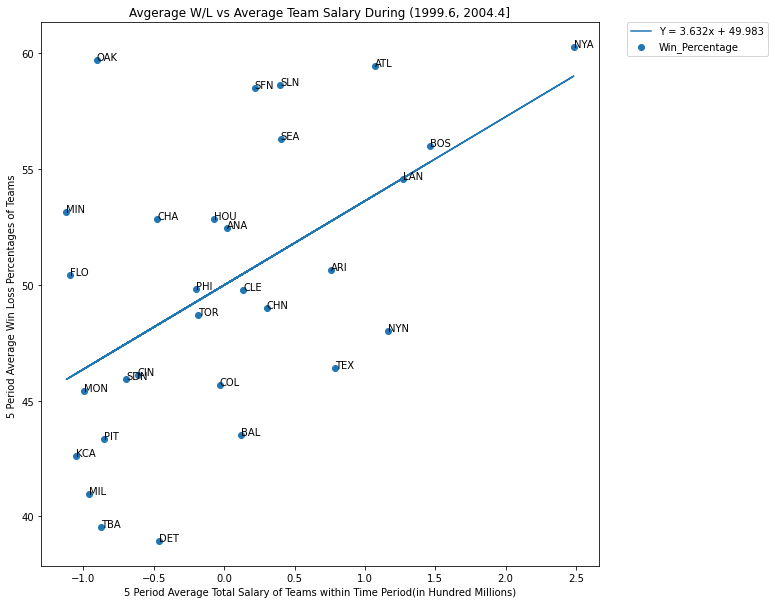

    teamID  yearID   W    G  total_sal  Win_Percentage bin
353    KCA    1990  75  161   1.667287       46.583851   1
793    TEX    1990  83  162  -0.582735       51.234568   1
162    CHN    1990  77  162  -0.914238       47.530864   1
536    NYN    1990  91  162   1.232949       56.172840   1
596    PHI    1990  77  162  -1.033631       47.530864   1
..     ...     ...  ..  ...        ...             ...  ..
710    SEA    2014  87  162  -0.159040       53.703704   5
680    SDN    2014  77  162  -0.527607       47.530864   5
216    CIN    2014  76  162   0.184170       46.913580   5
740    SFN    2014  88  162  -1.745978       54.320988   5
857    WAS    2014  96  162   0.704160       59.259259   5

[728 rows x 7 columns]


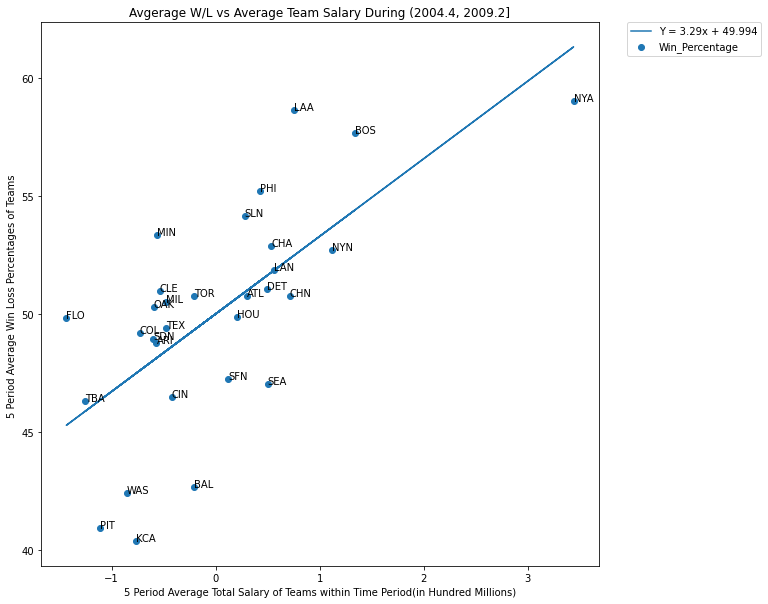

    teamID  yearID   W    G  total_sal  Win_Percentage bin
353    KCA    1990  75  161   1.667287       46.583851   1
793    TEX    1990  83  162  -0.582735       51.234568   1
162    CHN    1990  77  162  -0.914238       47.530864   1
536    NYN    1990  91  162   1.232949       56.172840   1
596    PHI    1990  77  162  -1.033631       47.530864   1
..     ...     ...  ..  ...        ...             ...  ..
710    SEA    2014  87  162  -0.159040       53.703704   5
680    SDN    2014  77  162  -0.527607       47.530864   5
216    CIN    2014  76  162   0.184170       46.913580   5
740    SFN    2014  88  162  -1.745978       54.320988   5
857    WAS    2014  96  162   0.704160       59.259259   5

[728 rows x 7 columns]


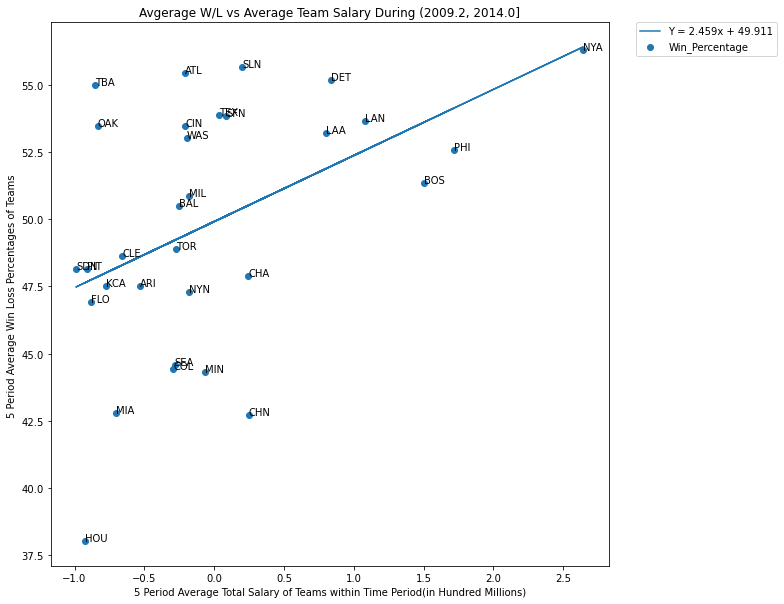

In [325]:
salaries['total_sal'] -= salaries.groupby('yearID')['total_sal'].transform(np.mean)
salaries['total_sal'] /= salaries.groupby('yearID')['total_sal'].transform(np.std)


ranges = pd.cut(salaries['yearID'],bins=5).unique()
salaries['bin'] = pd.cut(salaries['yearID'],bins=5,labels=['1','2','3','4','5'])
win_loss = salaries.groupby(['bin','teamID']).mean().reset_index()
for x in range(1,6):
    plt.figure(figsize=(10,10))
    bins = win_loss.loc[win_loss['bin'] == str(x)].dropna().reset_index()
    plt.scatter('total_sal','Win_Percentage', data=bins, marker='o')
    coeffs = (np.polyfit(bins['total_sal'], bins['Win_Percentage'], 1))
    plt.plot(bins['total_sal'], np.poly1d(np.polyfit(bins['total_sal'], bins['Win_Percentage'], 1))(bins['total_sal']), 
             label = "Y = " + str(round(coeffs[0],3)) + "x + " + str(round(coeffs[1],3)))
    
    
    for i, txt in enumerate(bins['teamID']):
        plt.annotate(txt, (bins['total_sal'][i], bins['Win_Percentage'][i]), fontsize=10)

    plt.title('Avgerage W/L vs Average Team Salary During ' + str(ranges[x-1]))
    plt.ylabel('5 Period Average Win Loss Percentages of Teams ')
    plt.xlabel('5 Period Average Z Score of Teams Salary Compared to League Average')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
  
    plt.show()

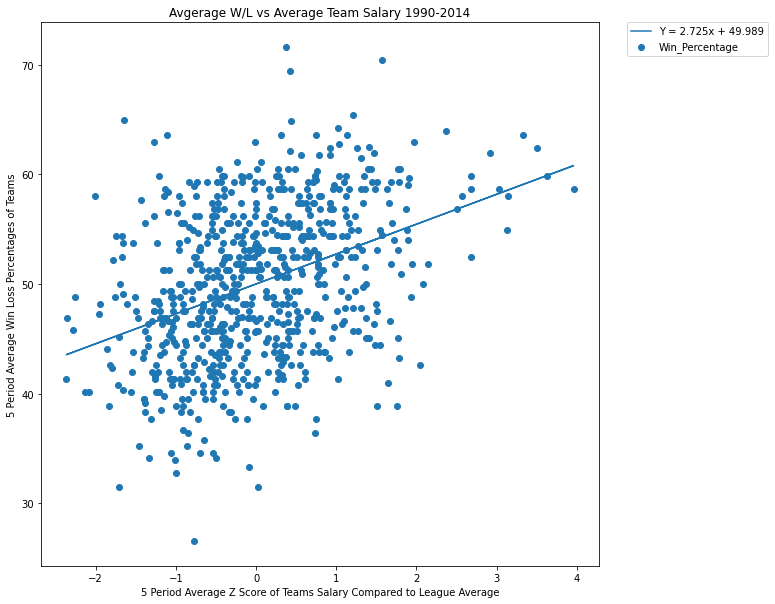

In [330]:
plt.figure(figsize=(10,10))
plt.scatter('total_sal','Win_Percentage', data=salaries, marker='o')
coeffs = (np.polyfit(salaries['total_sal'], salaries['Win_Percentage'], 1))
plt.plot(salaries['total_sal'], np.poly1d(np.polyfit(salaries['total_sal'], salaries['Win_Percentage'], 1))(salaries['total_sal']), 
             label = "Y = " + str(round(coeffs[0],3)) + "x + " + str(round(coeffs[1],3)))

plt.title('Avgerage W/L vs Average Team Salary 1990-2014')
plt.ylabel('5 Period Average Win Loss Percentages of Teams')
plt.xlabel('5 Period Average Z Score of Teams Salary Compared to League Average')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

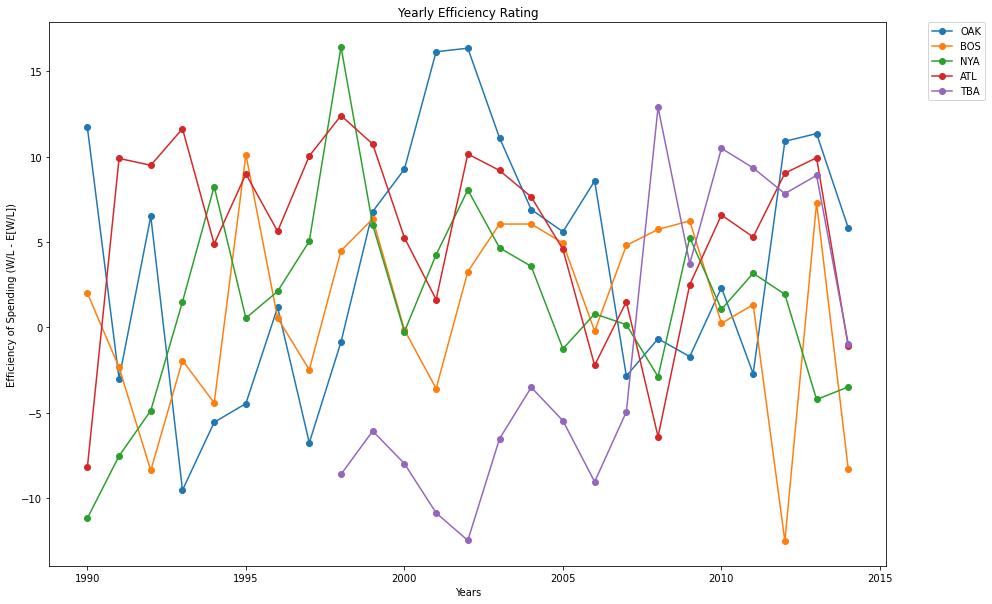

In [335]:
salaries['Efficiency'] = salaries['Win_Percentage'] - salaries['total_sal'].map(lambda x: 2.5*x+50)
teams = ['OAK','BOS','NYA','ATL','TBA']

plt.figure(figsize=(15,10))
for x in teams:
    temp = salaries.loc[salaries['teamID'] == x].sort_values(by='yearID')
    plt.plot('yearID','Efficiency', data = temp, marker = 'o',label = x)

plt.title('Yearly Efficiency Rating')
plt.ylabel('Efficiency of Spending (W/L - E[W/L])')
plt.xlabel('Years')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()